<a href="https://colab.research.google.com/github/ArchitTheCoder/Project-115/blob/main/C115_D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving C115D3.csv to C115D3.csv


In [2]:
import csv
import pandas as pd
import plotly.express as px
import numpy as np

In [5]:
data = pd.read_csv("C115D3.csv")
velocity = data["Velocity"].tolist()
escaped = data["Escaped"].tolist()

fig = px.scatter(x=velocity, y=escaped)
fig.show()

In [7]:
m, b = np.polyfit(velocity, escaped, 1)
y = []

for x in velocity:
  y_value = m * x + b
  y.append(y_value)
fig = px.scatter(x=velocity, y=escaped)
fig.update_layout(shapes=[dict(type="line", x0=min(velocity), x1=max(velocity), y0=min(y), y1=max(y))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



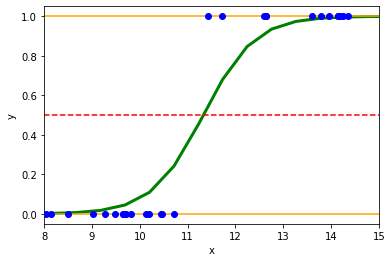

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(velocity, (len(velocity), 1))
Y = np.reshape(escaped, (len(escaped), 1))
lr = LogisticRegression()
lr.fit(X, Y)
plt.figure()
plt.scatter(X.ravel(), Y, color="blue", zorder=20)
def model(x):
  return 1/(1 + np.exp(-x))

X_test = np.linspace(0, 25, 50)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color="green", linewidth= 3)
plt.axhline(y=0, color= "orange", linestyle= "-")
plt.axhline(y=1, color= "orange", linestyle= "-")
plt.axhline(y=0.5, color= "red", linestyle= "--")

plt.axvline(x=X_test[11], color="black", linestyle= "--")

plt.ylabel("y")
plt.xlabel("x")
plt.xlim(8,15)
plt.show()

In [22]:
v = float(input("Enter the velocity: "))
chances = model(v * lr.coef_ + lr.intercept_).ravel()
if chances < 0.01:
  print("The object will not escape")
elif chances >= 1:
  print("The object will escape")
elif chances < 0.5:
  print("The object might not escape")
else:
  print("The object may escape")

Enter the velocity: 31
The object may escape
